In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data_path = '../data/nba_2022-23_all_stats_with_salary.csv'
salary_df = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
print(salary_df.head())

# Select relevant features and target variable
features = salary_df[['Position', 'Age', 'Team', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Total Minutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]
target = salary_df['Salary']

# Handle categorical variables using one-hot encoding
features = pd.get_dummies(features, columns=['Position', 'Team'], drop_first=True)

# Handle missing values if any
features = features.fillna(features.mean())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Save the predictions
results = X_test.copy()
results['actual_salary'] = y_test
results['predicted_salary'] = predictions
results.to_csv('../results/salary_predictions.csv', index=False)

# Display the results
print(results.head())


   Unnamed: 0        Player Name    Salary Position  Age     Team  GP  GS  \
0           0      Stephen Curry  48070014       PG   34      GSW  56  56   
1           1          John Wall  47345760       PG   32      LAC  34   3   
2           2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24   
3           3       LeBron James  44474988       PF   38      LAL  55  54   
4           4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47   

     MP    FG  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  
0  34.7  10.0  ...  12.5  31.0  5.8  2.0  7.8  0.192   7.5   0.1  7.5   4.7  
1  22.2   4.1  ...  17.1  27.0 -0.4  0.7  0.3  0.020  -0.8  -0.4 -1.2   0.1  
2  29.1   5.9  ...  18.4  27.7 -0.6  2.6  1.9  0.044   0.3  -0.1  0.2   1.2  
3  35.5  11.1  ...  11.6  33.3  3.2  2.4  5.6  0.138   5.5   0.6  6.1   4.0  
4  35.6  10.3  ...  13.4  30.7  4.7  2.1  6.8  0.194   6.0   1.2  7.1   3.9  

[5 rows x 52 columns]
Mean Squared Error: 50393126216521.74
     Age

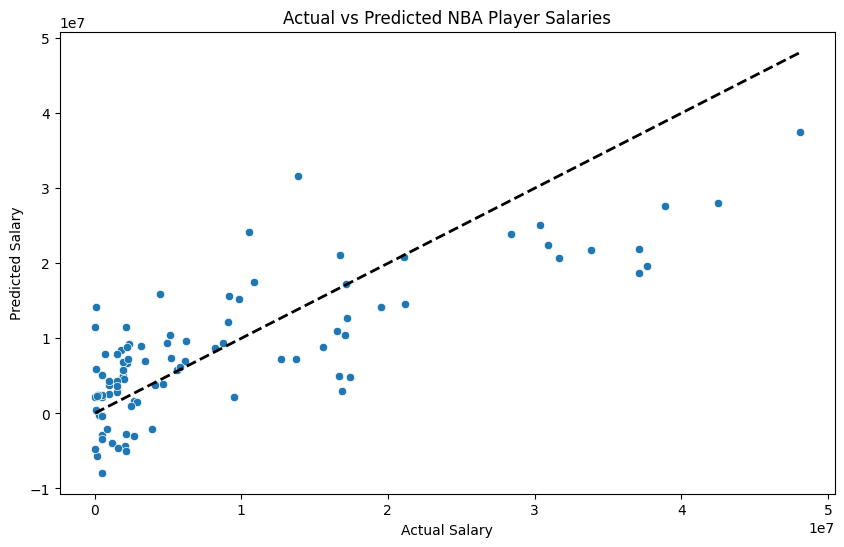

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted salaries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_salary', y='predicted_salary', data=results)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted NBA Player Salaries')
plt.plot([results['actual_salary'].min(), results['actual_salary'].max()], [results['actual_salary'].min(), results['actual_salary'].max()], 'k--', lw=2)
plt.show()